In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("C:/Users/wjddu/git/Domestic-Solar-Power-Output-Prediction/train_ori.csv")

In [3]:
dataframe = dataframe.loc[:, ~dataframe.T.duplicated()]
dataframe = dataframe.drop(['hour.1'], axis='columns')

In [4]:
dataframe

date  year  month  day  hour  pow_gen  temperature  humidity  \
0      2016-12-13-14  2016     12   13    14  140.631          4.3        77   
1      2016-12-13-15  2016     12   13    15   85.793          4.3        80   
2      2016-12-13-16  2016     12   13    16   32.590          3.8        80   
3      2016-12-13-17  2016     12   13    17    0.154          3.4        80   
4      2016-12-13-18  2016     12   13    18    0.000          2.6        86   
...              ...   ...    ...  ...   ...      ...          ...       ...   
35482  2020-12-31-19  2020     12   31    19    0.000         -0.9        65   
35483  2020-12-31-20  2020     12   31    20    0.000         -1.5        66   
35484  2020-12-31-21  2020     12   31    21    0.000         -1.9        75   
35485  2020-12-31-22  2020     12   31    22    0.000         -2.7        73   
35486  2020-12-31-23  2020     12   31    23    0.000         -4.0        84   

       dew_point  sol_rad  cloud  
0            0.6  100.000      0  
1            1.1   72.222      0  
2            0.6   55.556      0  
3            0.2   13.889      0  
4            0.4    2.778      0  
...          ...      ...    ...  
35482       -6.6    0.000      8  
35483       -7.0    0.000      8  
35484       -5.7    0.000      8  
35485       -6.8    0.000      8  
35486       -6.3    0.000      5  

[35487 rows x 11 columns]

In [5]:
import scipy.stats

y = dataframe['pow_gen']
x = dataframe['temperature']

scipy.stats.spearmanr(x, y).correlation

0.3173693849648737

In [6]:
import scipy.stats

y = dataframe['pow_gen']
x = dataframe['humidity']

scipy.stats.spearmanr(x, y).correlation

-0.3675317048251252

In [7]:
import scipy.stats

y = dataframe['pow_gen']
x = dataframe['dew_point']

scipy.stats.spearmanr(x, y).correlation

0.06966808618755516

In [8]:
import scipy.stats

y = dataframe['pow_gen']
x = dataframe['sol_rad']

scipy.stats.spearmanr(x, y).correlation

0.8488203279651918

In [9]:
import scipy.stats

y = dataframe['pow_gen']
x = dataframe['cloud']

scipy.stats.spearmanr(x, y).correlation

0.009215299218115685

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataframe["date"] = pd.to_datetime(dataframe["date"])

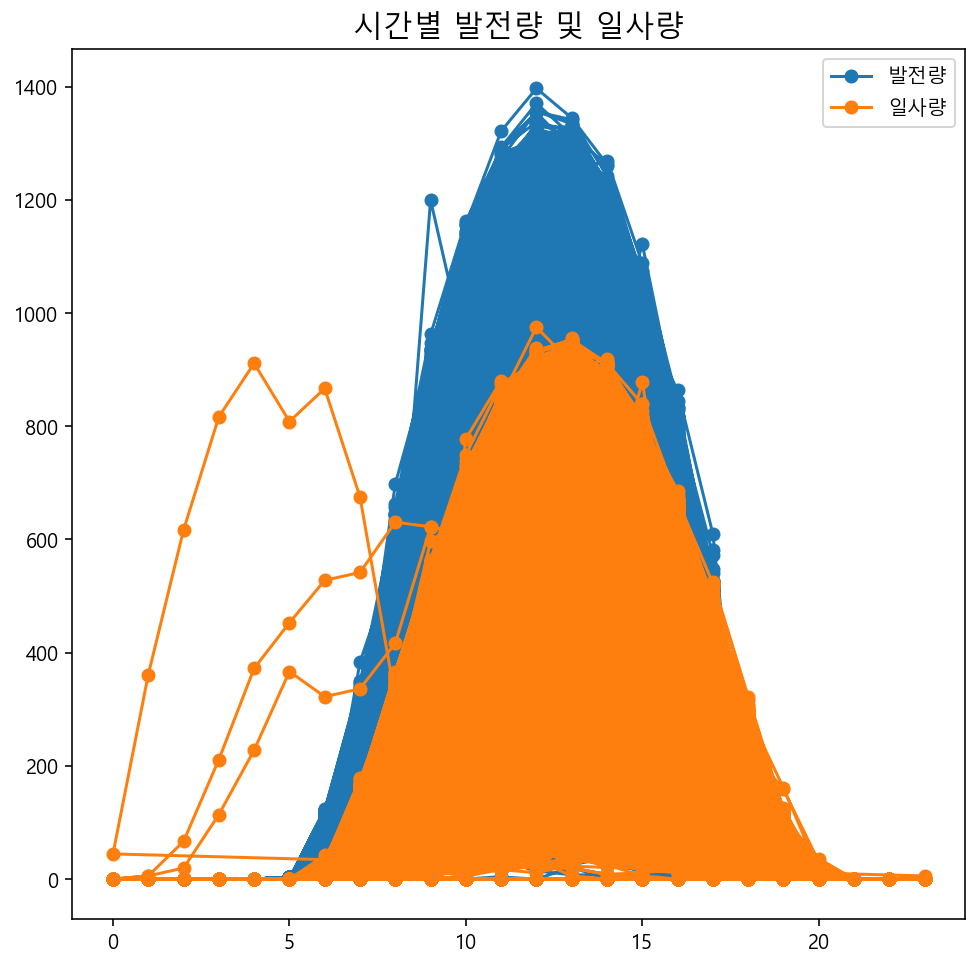

In [11]:
import matplotlib.pyplot as plt
import platform
platform.system()

if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'



days = dataframe['hour']

a_df = dataframe['pow_gen']
b_df = dataframe['sol_rad']
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(days,a_df,marker='o',label='발전량')
ax.plot(days,b_df,marker='o',label='일사량') 
 
ax.legend() ## 범례
 
plt.title('시간별 발전량 및 일사량',fontsize=15) ## 타이틀 설정
plt.show()